In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data_csv_out/data.csv')
df

,Unnamed: 0,clouds,visibility,wind_speed,wind_deg,weather_main,weather_desc,month,hour_stan,week,...,dewpoint_seasonal,dewpoint_residual,feelslike_trend,feelslike_seasonal,feelslike_residual,temp_w_seas,pressure_w_seas,humidity_w_seas,dewpoint_w_seas,feelslike_w_seas
0,0,20,1.0,1.03,0.000000,Clouds,few clouds,1,0.521739,0.019231,...,-0.018475,-0.181894,0.366143,0.021325,0.046472,0.535191,0.588165,0.287284,0.337794,0.443194
1,1,20,1.0,1.54,0.694444,Clouds,few clouds,1,0.565217,0.019231,...,-0.010307,-0.132435,0.365299,0.026815,0.237363,0.717525,-0.063219,0.241627,0.398223,0.646357
2,11,20,1.0,1.03,0.000000,Clouds,few clouds,1,1.000000,0.019231,...,-0.001919,-0.022832,0.370033,-0.009264,-0.041920,0.301980,0.554979,0.719002,0.515238,0.315895
3,14,20,1.0,1.03,0.000000,Clouds,few clouds,1,0.086957,0.019231,...,0.000277,0.024388,0.383013,-0.014610,-0.226301,0.277890,-0.054961,0.821800,0.561206,0.140026
4,15,20,1.0,0.51,0.000000,Rain,light rain,1,0.130435,0.019231,...,0.003777,0.025868,0.383453,-0.012375,-0.233087,0.272107,-0.051293,0.827462,0.559550,0.136284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,2886,20,1.0,0.00,0.000000,Rain,light rain,4,0.826087,0.326923,...,0.005187,-0.098984,0.453049,0.019244,0.211587,0.441389,-0.787581,0.631346,0.544282,0.512914
2522,2887,20,1.0,0.51,0.000000,Clouds,few clouds,4,0.869565,0.326923,...,0.010590,-0.098984,0.453049,0.016633,0.211587,0.344998,-0.893630,0.756092,0.565951,0.403549
2523,2888,20,1.0,1.03,0.000000,Clouds,few clouds,4,0.913043,0.326923,...,0.016414,-0.098984,0.453049,0.014616,0.211587,0.297653,-0.513480,0.885591,0.610582,0.356277
2524,2889,20,1.0,0.00,0.000000,Clouds,few clouds,4,0.956522,0.326923,...,0.017772,-0.098984,0.453049,0.003146,0.211587,0.293964,-0.052842,0.911672,0.620836,0.357551


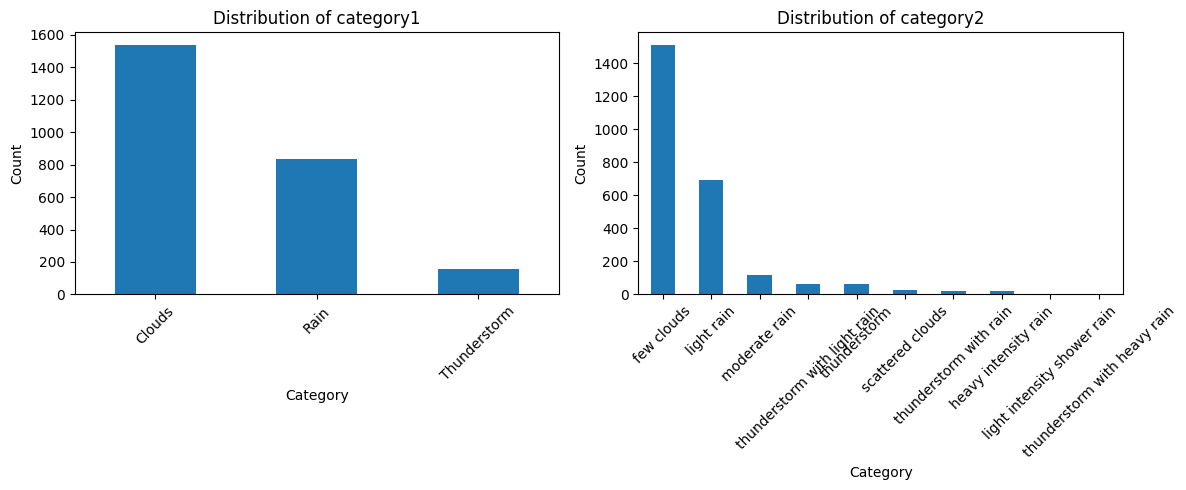

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Example categorical columns: 'category1', 'category2'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
df['weather_main'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of category1')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Second subplot
df['weather_desc'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution of category2')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [3]:
count1 = df['weather_main'].value_counts().reset_index()
count1.columns = ['weather_main', 'Count1']

count2 = df['weather_desc'].value_counts().reset_index()
count2.columns = ['weather_desc', 'Count2']

print("weather_main Count:\n", count1)
print("\nweather_desc Count:\n", count2)


weather_main Count:
    weather_main  Count1
0        Clouds    1538
1          Rain     833
2  Thunderstorm     155

weather_desc Count:
                    weather_desc  Count2
0                    few clouds    1513
1                    light rain     695
2                 moderate rain     115
3  thunderstorm with light rain      66
4                  thunderstorm      65
5              scattered clouds      25
6        thunderstorm with rain      21
7          heavy intensity rain      18
8   light intensity shower rain       5
9  thunderstorm with heavy rain       3


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = df.drop(['weather_main', 'weather_desc'], axis=1)
y = df['weather_main']
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

print(pd.Series(y_train_resampled).value_counts())

weather_main
Clouds          1538
Rain            1538
Thunderstorm    1538
Name: count, dtype: int64
